In [1]:
import pandas as pd
 
tabela = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")
 
display(tabela)

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902671,163,UNIVERSIDADE ESTÁCIO DE SÁ,Privada com fins lucrativos,Universidade,1518220,CIÊNCIA DE DADOS,Tecnológico,NaN,Educação a Distância,Em atividade,2589,2086,456,Ciência de dados,4300604,Alvorada,RS,SUL
902672,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1468267,MÚSICA,Licenciatura,Formação de professor de música,Educação a Distância,Em atividade,1700,3992,42,Formação de professor de música,2704302,Maceió,AL,NORDESTE
902673,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1185929,CIÊNCIAS CONTÁBEIS,Bacharelado,Ciências contábeis,Educação a Distância,Em atividade,4500,3260,138,Ciências contábeis,3554003,Tatuí,SP,SUDESTE
902674,298,Universidade Pitágoras Unopar Anhanguera,Privada com fins lucrativos,Universidade,97329,MARKETING,Tecnológico,NaN,Educação a Distância,Em atividade,6000,1700,158,Marketing,2601102,Araripina,PE,NORDESTE


In [2]:
qtd_cursos = tabela[["NOME_CURSO", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "REGIAO"]).sum()
 
qtd_cursos_final = qtd_cursos.query('QT_VAGAS_AUTORIZADAS != 0')
 
display(qtd_cursos_final)

QT_VAGAS_AUTORIZADAS
NOME_CURSO                         REGIAO                                 
ABI - ARTES VISUAIS                SUDESTE                               1
ABI - CIÊNCIAS BIOLÓGICAS          CENTRO-OESTE                         40
                                   SUDESTE                              82
ABI - CIÊNCIAS DA ATIVIDADE FÍSICA SUDESTE                              60
ABI - CIÊNCIAS DA NATUREZA         SUDESTE                              40
...                                                                    ...
ÓPTICA E OPTOMETRIA                IGNORADO/EXTERIOR                  1000
                                   NORDESTE                         123550
                                   NORTE                             38500
                                   SUDESTE                          184970
                                   SUL                               83900

[4657 rows x 1 columns]

In [3]:
df = pd.DataFrame(tabela)
 
regiao = df[df['MUNICIPIO'] == 'Fortaleza']
 
cursos = regiao[["NOME_CURSO", "NOME_IES", "MUNICIPIO", "UF", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "NOME_IES", "MUNICIPIO", "UF", "REGIAO"]).sum()
 
cursos_ativos = cursos.query('QT_VAGAS_AUTORIZADAS != 0')
 
display(cursos_ativos)
 
cursos_ativos.to_excel('cursos_Fortaleza.xlsx')

QT_VAGAS_AUTORIZADAS
NOME_CURSO                                         NOME_IES                                        MUNICIPIO UF REGIAO                        
ACONSELHAMENTO TUTELAR PARA INFÂNCIA E ADOLESCÊ... CENTRO UNIVERSITÁRIO INTERNACIONAL              Fortaleza CE NORDESTE                  1500
ADMINISTRAÇÃO                                      CENTRO UNIVERSITÁRIO ADVENTISTA DE SÃO PAULO    Fortaleza CE NORDESTE                  3480
                                                   CENTRO UNIVERSITÁRIO ANHANGUERA DE FORTALEZA    Fortaleza CE NORDESTE                   100
                                                   CENTRO UNIVERSITÁRIO ANHANGUERA PITÁGORAS AMPLI Fortaleza CE NORDESTE                  5000
                                                   CENTRO UNIVERSITÁRIO ATENEU                     Fortaleza CE NORDESTE                   970
...                                                                                                                                        ...
TÉCNICAS PARA TELEMEDICINA                         CENTRO UNIVERSITÁRIO LEONARDO DA VINCI          Fortaleza CE NORDESTE                  7610
VAREJO DIGITAL                                     CENTRO UNIVERSITÁRIO INTERNACIONAL              Fortaleza CE NORDESTE                  2000
                                                   CENTRO UNIVERSITÁRIO LEONARDO DA VINCI          Fortaleza CE NORDESTE                  7610
ZOOTECNIA                                          UNIVERSIDADE FEDERAL DO CEARÁ                   Fortaleza CE NORDESTE                    60
ÓPTICA E OPTOMETRIA                                UNIVERSIDADE CRUZEIRO DO SUL                    Fortaleza CE NORDESTE                  1000

[3051 rows x 1 columns]

In [4]:
df2 = pd.DataFrame(tabela)
 
cidade = df2[df2['MUNICIPIO'] == 'Fortaleza']
 
cursos_lins = cidade[["CATEGORIA_ADMINISTRATIVA", "QT_VAGAS_AUTORIZADAS"]].groupby("CATEGORIA_ADMINISTRATIVA").sum()
 
display(cursos_lins)
 
cursos_lins.to_excel("vagas_Fortaleza.xlsx")

,QT_VAGAS_AUTORIZADAS
CATEGORIA_ADMINISTRATIVA,
Privada com fins lucrativos,9679864
Privada sem fins lucrativos,454943
Pública Estadual,7341
Pública Federal,16834


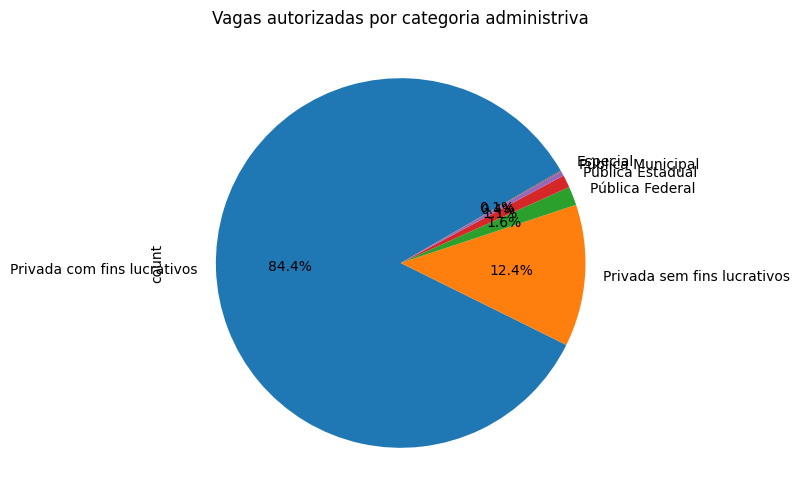

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
 
arquivo = pd.read_csv('PDA_Dados_Cursos_Graduacao_Brasil.csv')
 
dados_grafico = arquivo['CATEGORIA_ADMINISTRATIVA'].value_counts()
dados_g = arquivo['QT_VAGAS_AUTORIZADAS'].value_counts()
 
dados_grafico.plot.pie(autopct='%1.1f%%', startangle=30, figsize=(6, 6))
plt.title('Vagas autorizadas por categoria administriva')
 
plt.savefig('situacao.png', bbox_inches='tight')
plt.show()

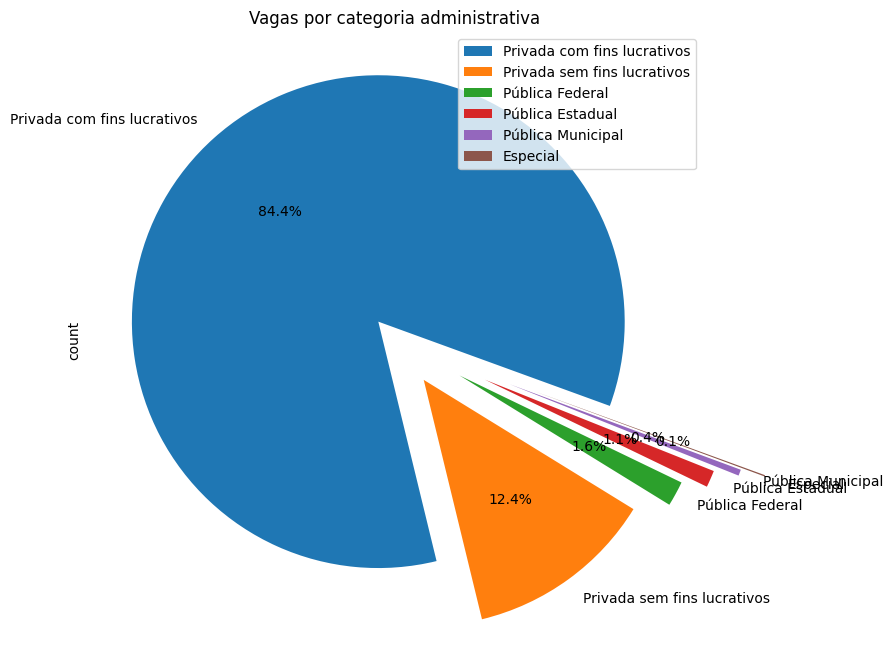

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
 
arquivo = pd.read_csv('PDA_Dados_Cursos_Graduacao_Brasil.csv')
 
dados_grafico = arquivo['CATEGORIA_ADMINISTRATIVA'].value_counts()
dados_g= arquivo['QT_VAGAS_AUTORIZADAS'].value_counts()
 
explode = [0.1 + i * 0.1 for i in range(len(dados_grafico))]
 
dados_grafico.plot.pie(autopct='%1.1f%%', startangle=-20, figsize=(8, 8), explode=explode)
 
plt.title('Vagas por categoria administrativa')
 
plt.legend(dados_grafico.index, loc="best")
 
plt.savefig('modalidade.png', bbox_inches='tight')
plt.show()